In [1]:
import numpy as np

from SDE_tools import DiffusionTools
from SDE_dataclass import LabeledDataset
from SDE_model import UNet
from SDE_utils import *

In [2]:
model = UNet()
model.load_state_dict(torch.load(r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\SDE_conditioned\results\SDE_ConditionedwTest_128_500\models\SDE_ConditionedwTest_128_500_final.pth"))
model.eval()

UNet(
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): ReLU()
  )
  (conv0): Conv2d(6, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downs): ModuleList(
    (0): Block(
      (time_mlp): Linear(in_features=128, out_features=128, bias=True)
      (conv1): Conv2d(64, 128, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
      (transform): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (time_mlp): Linear(in_features=128, out_features=256, bias=True)
      (conv1): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
      (transform)

In [3]:
sampler = DiffusionTools()
references, generated, structure = sample_model_output(model, sampler,n=5, test_path=r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\SDE_conditioned\results\SDE_ConditionedwTest_128_500\test_indices.pth", path=r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\SDE_conditioned\results\SDE_ConditionedwTest_128_500\images")

Using test data
Loaded 100 test indices


999it [03:27,  4.81it/s]


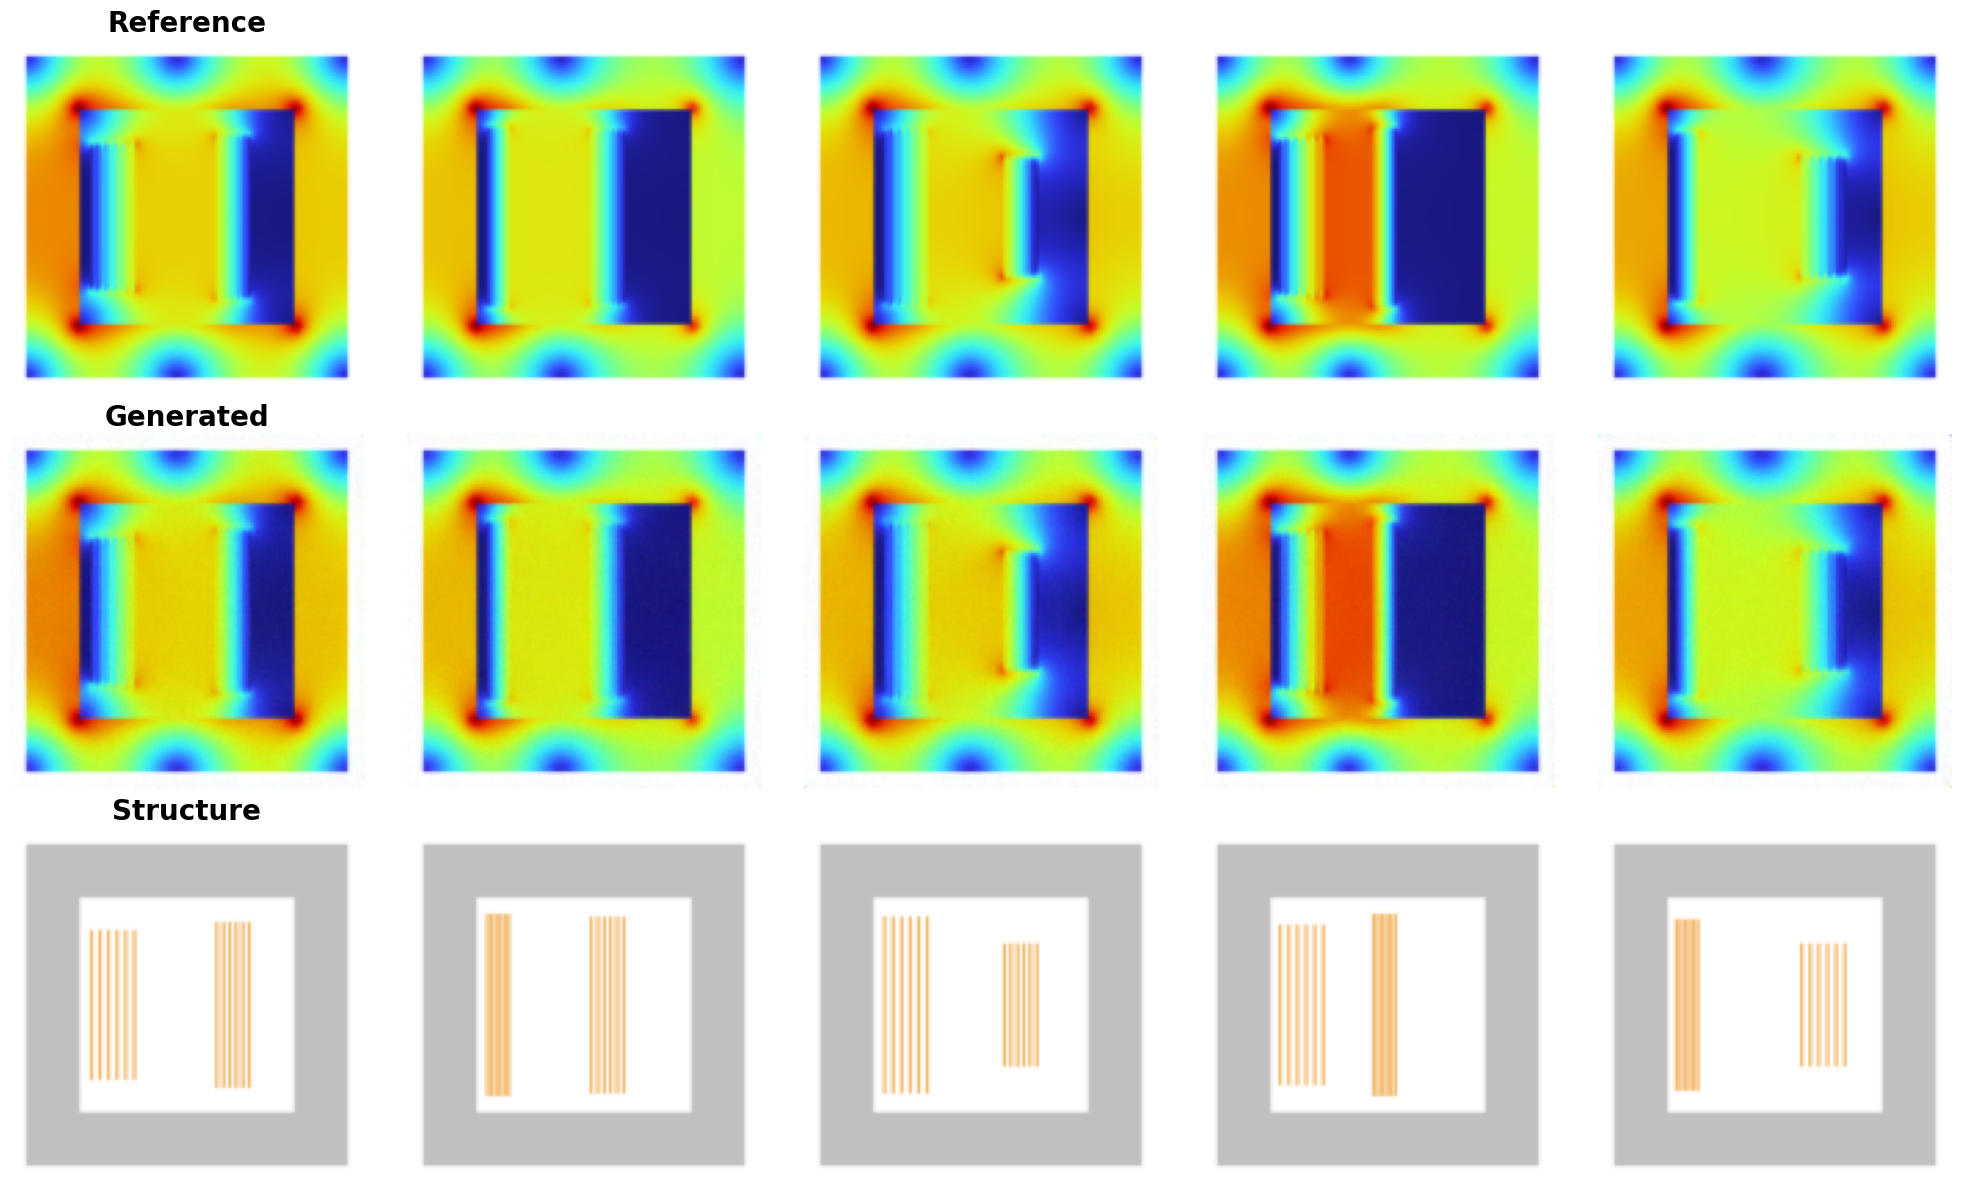

ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

In [4]:
save_image_list(generated, r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\SDE_conditioned\results\SDE_ConditionedwTest_128_500\images")
save_images(reference_images=references, generated_images=generated, structure_images=structure, path=r"C:\Users\20202137\OneDrive - TU Eindhoven\Programming\Python\MachineLearning\MachineLearningModels\SDE_conditioned\results\SDE_ConditionedwTest_128_500\images\output1.jpg")

In [5]:
ssim, psnr, mse = calculate_metrics(references, generated)

AttributeError: 'Image' object has no attribute 'max'

In [6]:
print(np.mean(ssim), np.mean(psnr), np.mean(mse))

0.9751665163184449 -11.959708990425115 16.190299479166665
